Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Do the following in the iris dataset.
#### 1. Read the dataset to the python environment.
#### 2. Do necessary pre-processing steps.
#### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).


Import the Dataset

In [2]:
iris_df=pd.read_csv('iris.csv')

In [3]:
iris_df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#No:of rows and columns
iris_df.shape

(150, 5)

In [5]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#Datatypes
iris_df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

## Pre-processing steps

In [8]:
#Checking for missing values
iris_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Missing values found in 'SL', 'SW', 'PL'.

In [9]:
iris_df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

##### Filling missing values 

In [10]:
for i in['SL', 'SW', 'PL']:
    iris_df[i]=iris_df[i].fillna(iris_df[i].median())

In [11]:
iris_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris_df['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

### Splitting the dataset

In [14]:
y=iris_df['Classification']
x=iris_df.drop(['Classification'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [16]:
x_train.shape

(105, 4)

In [17]:
x_test.shape

(45, 4)

### Logistic regression


In [18]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [20]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9777777777777777


In [21]:
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Precision is: 0.9777777777777777
Recall is: 0.9777777777777777
F1 score is: 0.9777777777777777


In [22]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

## SVM

In [23]:
from sklearn.svm import SVC
model=SVC(kernel='linear') #By using Linear classifier
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Accuracy using svm is',accuracy_score(y_test,y_pred))

Accuracy using svm is 1.0


In [24]:
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [25]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

## DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on Decision tree model is',accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is 1.0


In [27]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(1,11)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

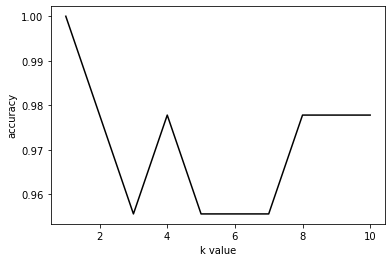

In [29]:
plt.plot(neighbors, acc_values,'0.')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [30]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9555555555555556


#### Insights: SVM and Decision tree model giving very high accuracy

In [31]:
iris_df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Standard scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [33]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [34]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9333333333333333


In [35]:
acc_values=[]
neighbors=np.arange(1,11)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

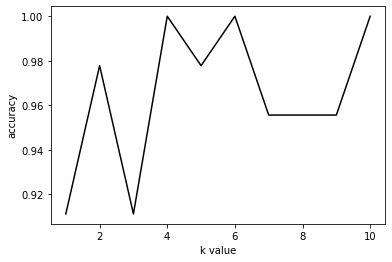

In [36]:
plt.plot(neighbors, acc_values,'0.')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [37]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9777777777777777


##### After standard scaling
* Logistic regression giving accuracy:0.9333333333333333
* KNN giving better accuracy: 0.9777777777777777

#### Random Forest Algorithm

#### Building a model

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [41]:
#for checking the model accuracy
print('The accuracy of the Random forest is:',accuracy_score(y_pred,y_test))

The accuracy of the Random forest is: 0.9555555555555556


In [42]:
confusion_matrix(y_test, y_pred)


array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]], dtype=int64)

##### Another method for buiding the model using Random Forest Algorithm

In [43]:
#Build the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [44]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_pred,average='micro')

0.9777777777777777

In [45]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [46]:
#Feature importance
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    52.563512
PL    32.876849
SL    10.127855
SW     4.431784
dtype: float64

In [47]:
#Distribution of prediction probabilities
threshold=0.22
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred=(y_pred_prob>threshold).astype(int)

In [48]:
#Fine Tuning of Hyperparameters
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
rft=RandomForestClassifier(n_estimators=10,max_depth=10,random_state=0,criterion="entropy")

In [50]:
rft.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=0)

In [51]:
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred,average='micro')

0.9555555555555556

#### RESULT:
#### * Logistic regression gives: 0.9777777777777777, After standard scaling accuracy is:0.9333333333333333
#### * KNN gives accuracy:0.9777777777777777
#### * Decision tree model is giving accuracy: 1.0
#### * SVM is also giving accuracy:1.0
#### * Random forest gives accuracy:0.9555555555555556
##### SVM AND DECISION TREE MODEL GIVING BEST RESULT

#### SUBMITTED BY:LISA SHAJI(DSA-B3)